In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [3]:
# Load dataset
df = pd.read_csv('/Users/pyaekyitharchaw/Documents/CSCT Project/Data/botswana_bank_customer_churn.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,...,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,...,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,...,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,...,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,...,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,...,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [6]:
df.describe()

,RowNumber,Number of Dependents,Income,Customer Tenure,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,57820.500000,2.502923,52641.363046,15.490591,574.299775,15.546602,25502.731792,0.121878,124639.209748,2.999274,4.991724
std,33382.536902,1.707249,27429.756390,8.654217,159.067499,8.654630,14127.859827,0.327147,72210.476638,1.411361,3.159283
min,1.000000,0.000000,5000.960000,1.000000,300.000000,1.000000,1000.430000,0.000000,1.060000,1.000000,0.000000
25%,28910.750000,1.000000,28857.070000,8.000000,436.000000,8.000000,13226.060000,0.000000,61991.915000,2.000000,2.000000
50%,57820.500000,3.000000,52658.110000,15.000000,574.000000,16.000000,25505.285000,0.000000,124505.890000,3.000000,5.000000
75%,86730.250000,4.000000,76364.157500,23.000000,712.000000,23.000000,37742.250000,0.000000,187122.922500,4.000000,8.000000
max,115640.000000,5.000000,99999.510000,30.000000,850.000000,30.000000,49999.690000,1.000000,249998.910000,5.000000,10.000000


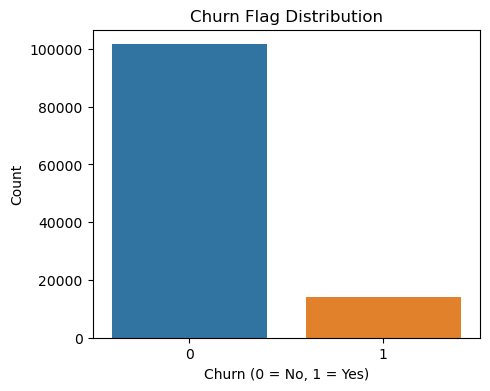

In [11]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Churn Flag', data=df)
plt.title('Churn Flag Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

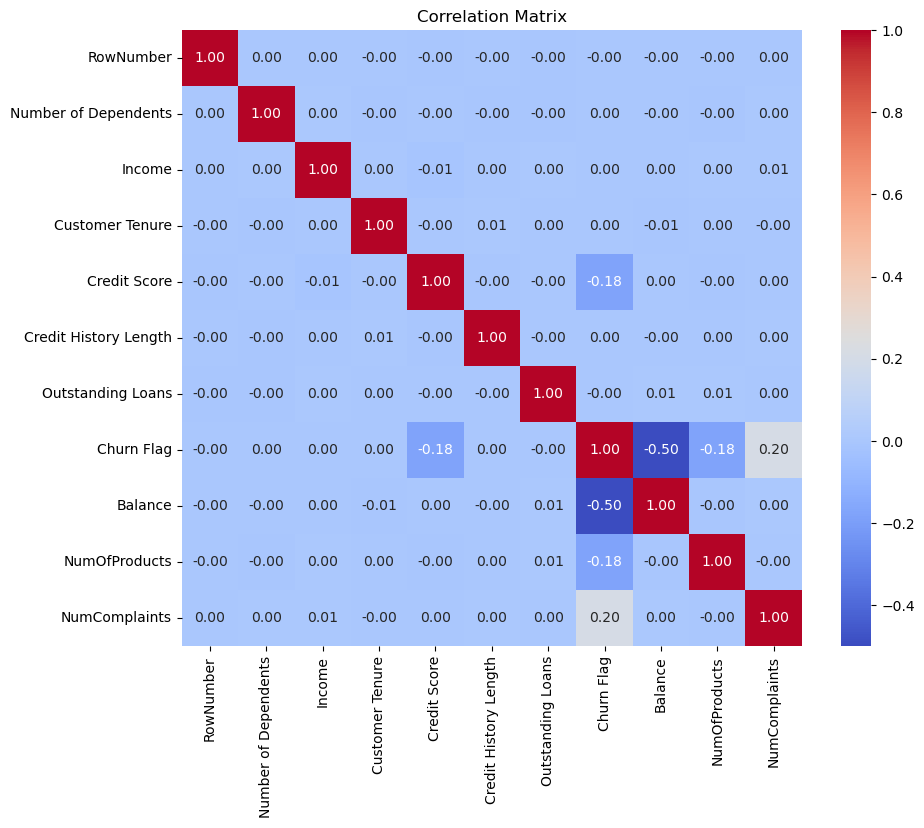

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

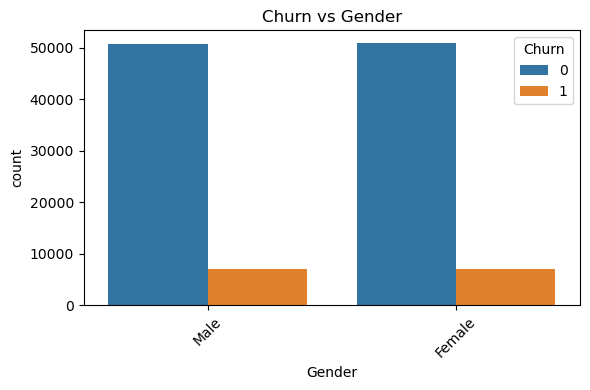

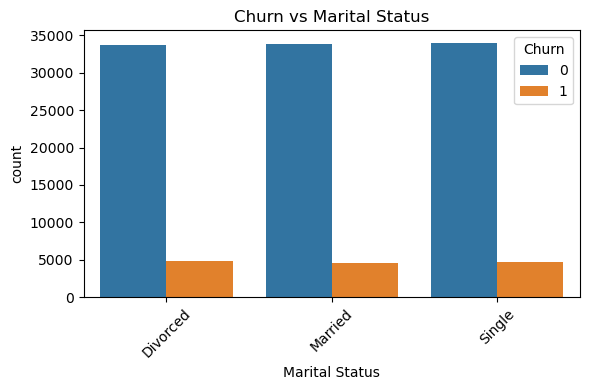

In [14]:
categorical_to_check = ['Gender', 'Marital Status']  # adjust as needed
for col in categorical_to_check:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, hue='Churn Flag')
        plt.title(f'Churn vs {col}')
        plt.legend(title='Churn')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

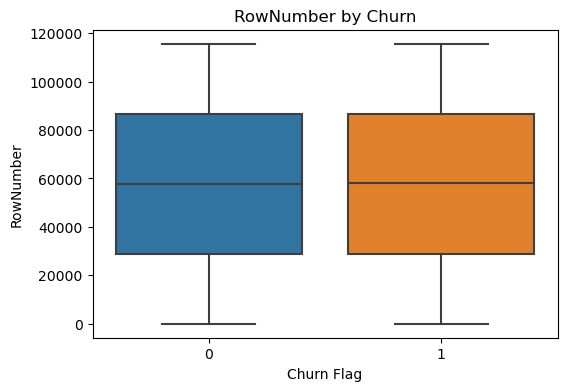

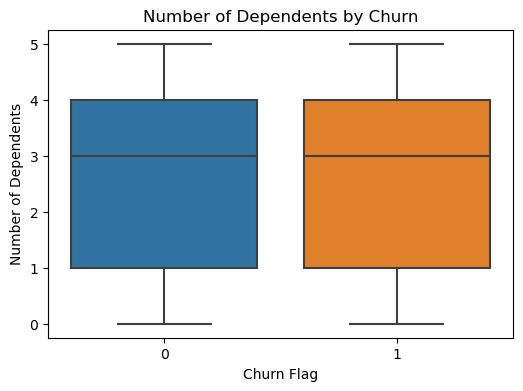

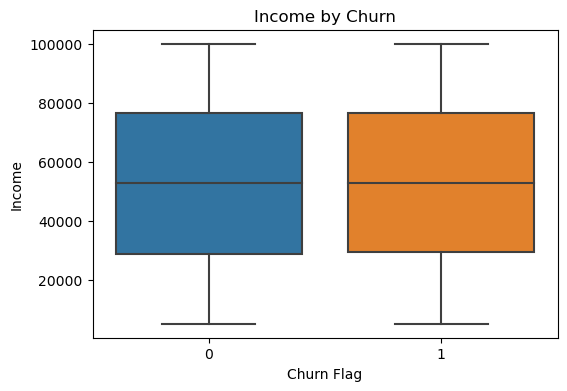

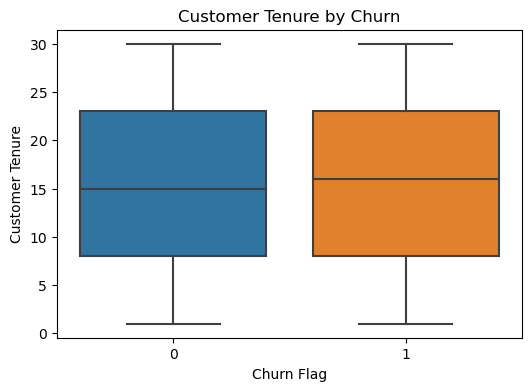

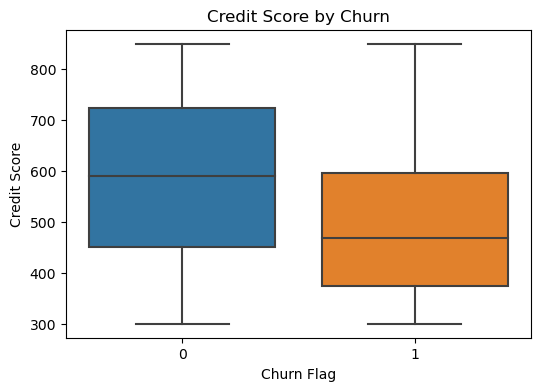

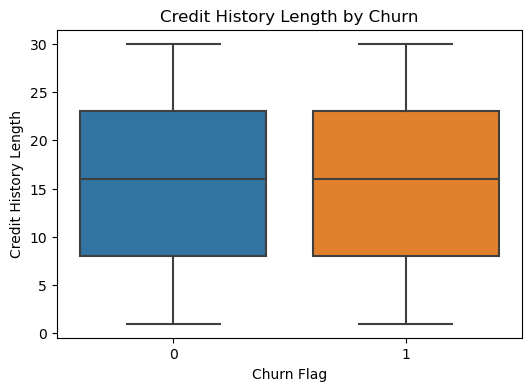

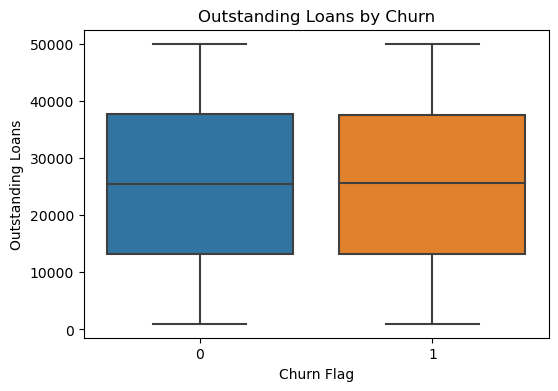

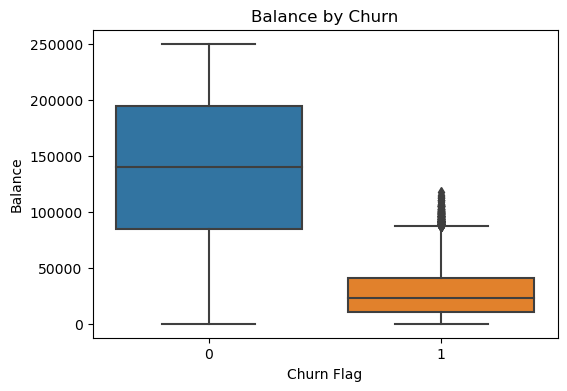

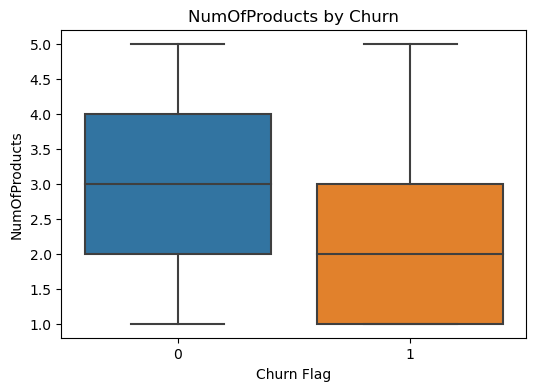

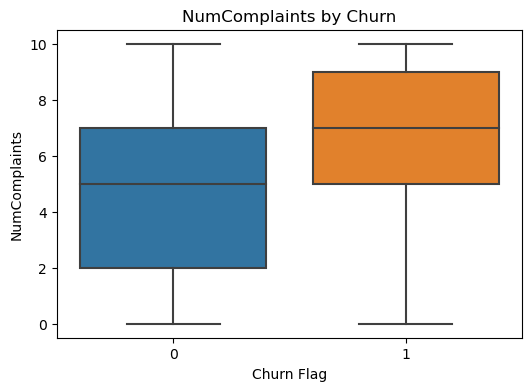

In [15]:
for col in num_cols:
    if col != 'Churn Flag':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='Churn Flag', y=col, data=df)
        plt.title(f'{col} by Churn')
        plt.show()

In [2]:
# Binning
df['Income Band'] = pd.qcut(df['Income'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Balance Band'] = pd.qcut(df['Balance'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Outstanding Loans Band'] = pd.qcut(df['Outstanding Loans'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Label encoding
le_income = LabelEncoder()
df['Income Band Encoded'] = le_income.fit_transform(df['Income Band'])

le_balance = LabelEncoder()
df['Balance Band Encoded'] = le_balance.fit_transform(df['Balance Band'])

le_outstanding = LabelEncoder()
df['Outstanding Loans Band Encoded'] = le_outstanding.fit_transform(df['Outstanding Loans Band'])

# Save encoders and bins
income_bins = pd.qcut(df['Income'], q=5, retbins=True, duplicates='drop')[1]
balance_bins = pd.qcut(df['Balance'], q=5, retbins=True, duplicates='drop')[1]
outstanding_bins = pd.qcut(df['Outstanding Loans'], q=5, retbins=True, duplicates='drop')[1]

joblib.dump(le_income, 'le_income.pkl')
joblib.dump(le_balance, 'le_balance.pkl')
joblib.dump(le_outstanding, 'le_outstanding.pkl')
joblib.dump(income_bins, 'income_bins.pkl')
joblib.dump(balance_bins, 'balance_bins.pkl')
joblib.dump(outstanding_bins, 'outstanding_bins.pkl')

['outstanding_bins.pkl']

In [3]:
features = [
    'Credit Score', 'Customer Tenure', 'Balance Band Encoded',
    'NumOfProducts', 'Outstanding Loans Band Encoded', 'Income Band Encoded',
    'Credit History Length', 'NumComplaints'
]
target = 'Churn Flag'

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [4]:
models = {
    'XGBoost': XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'LGBM': LGBMClassifier(max_depth=5, num_leaves=20, class_weight='balanced', boosting_type='gbdt', objective='binary', random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n Model: {name}")
    y_pred = cross_val_predict(model, X_scaled, y, cv=cv)
    y_proba = cross_val_predict(model, X_scaled, y, cv=cv, method='predict_proba')[:, 1]

    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))

    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    print("ROC AUC Score:")
    print(f"{roc_auc_score(y, y_proba):.4f}")



 Model: XGBoost


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

Confusion Matrix:
[[95831  5715]
 [  604 13490]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97    101546
           1       0.70      0.96      0.81     14094

    accuracy                           0.95    115640
   macro avg       0.85      0.95      0.89    115640
weighted avg       0.96      0.95      0.95    115640

ROC AUC Score:
0.9890

 Model: Logistic Regression
Confusion Matrix:
[[85181 16365]
 [ 1671 12423]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90    101546
           1       0.43      0.88      0.58     14094

    accuracy                           0.84    115640
   macro avg       0.71      0.86      0.74    115640
weighted avg       0.91      0.84      0.86    115640

ROC AUC Score:
0.9341

 Model: Random Forest
Confusion Matrix:
[[99708  1838]
 [ 3043 11051]]

Classification Report:
              precision    reca

/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11275, number of negative: 81237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11275, number of negative: 81237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11275, number of negative: 81237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11275, number of negative: 81237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11276, number of negative: 81236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11275, number of negative: 81237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11275, number of negative: 81237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11275, number of negative: 81237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11275, number of negative: 81237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[95260  6286]
 [  303 13791]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    101546
           1       0.69      0.98      0.81     14094

    accuracy                           0.94    115640
   macro avg       0.84      0.96      0.89    115640
weighted avg       0.96      0.94      0.95    115640

ROC AUC Score:
0.9903


In [5]:

final_model = LGBMClassifier(max_depth=5, num_leaves=20, class_weight='balanced', boosting_type='gbdt', objective='binary', random_state=42)
final_model.fit(X_scaled, y)
joblib.dump(final_model, 'lgbm_churn_model.pkl')
print("✅ Final model saved.")


[LightGBM] [Info] Number of positive: 14094, number of negative: 101546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 115640, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
✅ Final model saved.
